# Diabetes Prediction

**Organization:** CodeAlpha  
**Task:** Disease Prediction from Medical Data  
**Objective:** Predict the likelihood of diabetes in patients classification techniques such as Logistic Regression, SVM, Random Forest, and XGBoost to identify the most effective model for accurate prediction.


In [4]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
# Load the data
df = pd.read_csv("/kaggle/input/diabetes-data-set/diabetes.csv")
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
# EDA 
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Feature Engineering

1. Handle Zero Values

    * Some features like Glucose, BloodPressure, SkinThickness, Insulin, and BMI have 0 which is not valid medically → treat as missing.

In [8]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)


2. Impute Missing Values

    * Replace missing (NaN) with median or mean values:

In [9]:

imputer = SimpleImputer(strategy='median')
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = imputer.fit_transform(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])

# Visualize Feature Distributions

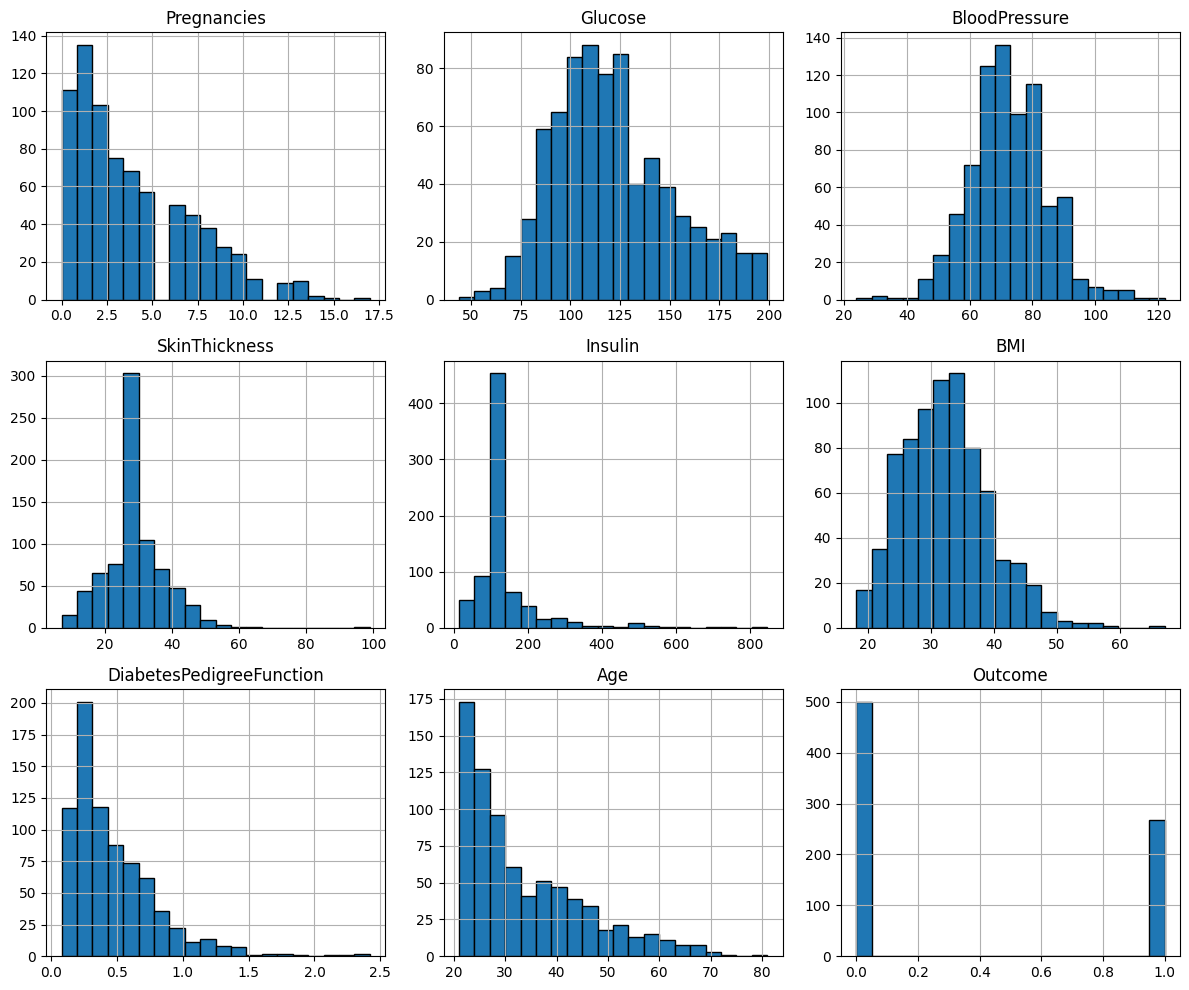

In [10]:
# Plot histograms for all features
df.hist(figsize=(12,10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

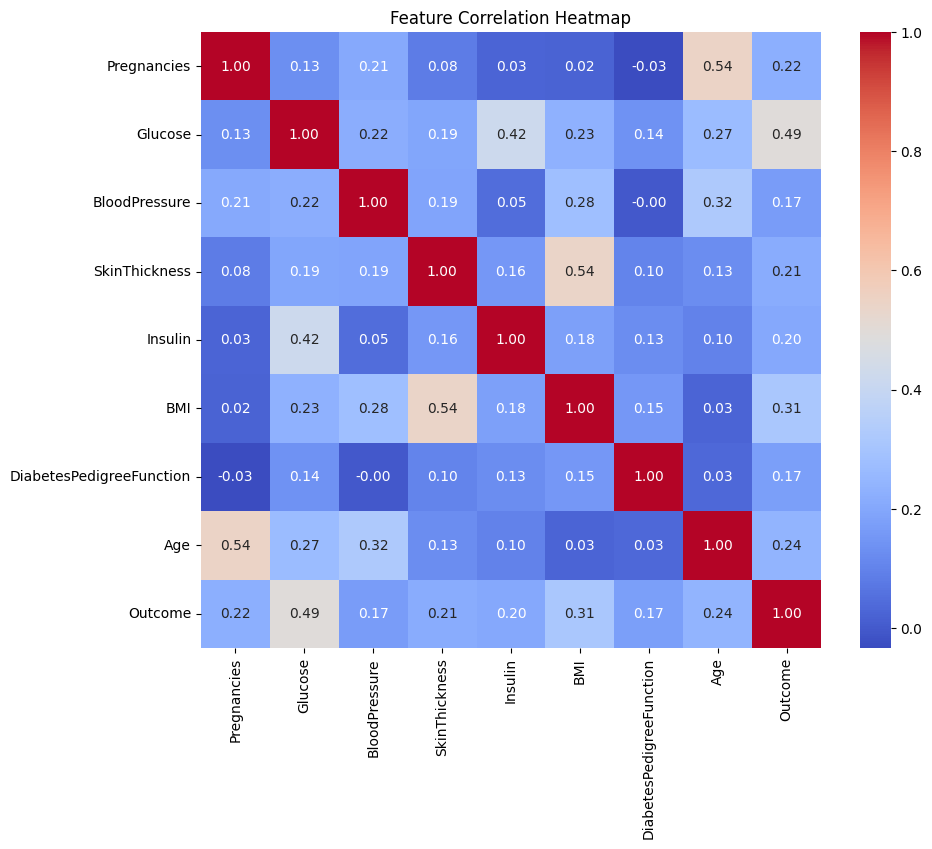

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


Look at how strongly features correlate with Outcome.

Glucose, BMI, and Age often have strong correlation with diabetes.

## Pairplot ( for small datasets)

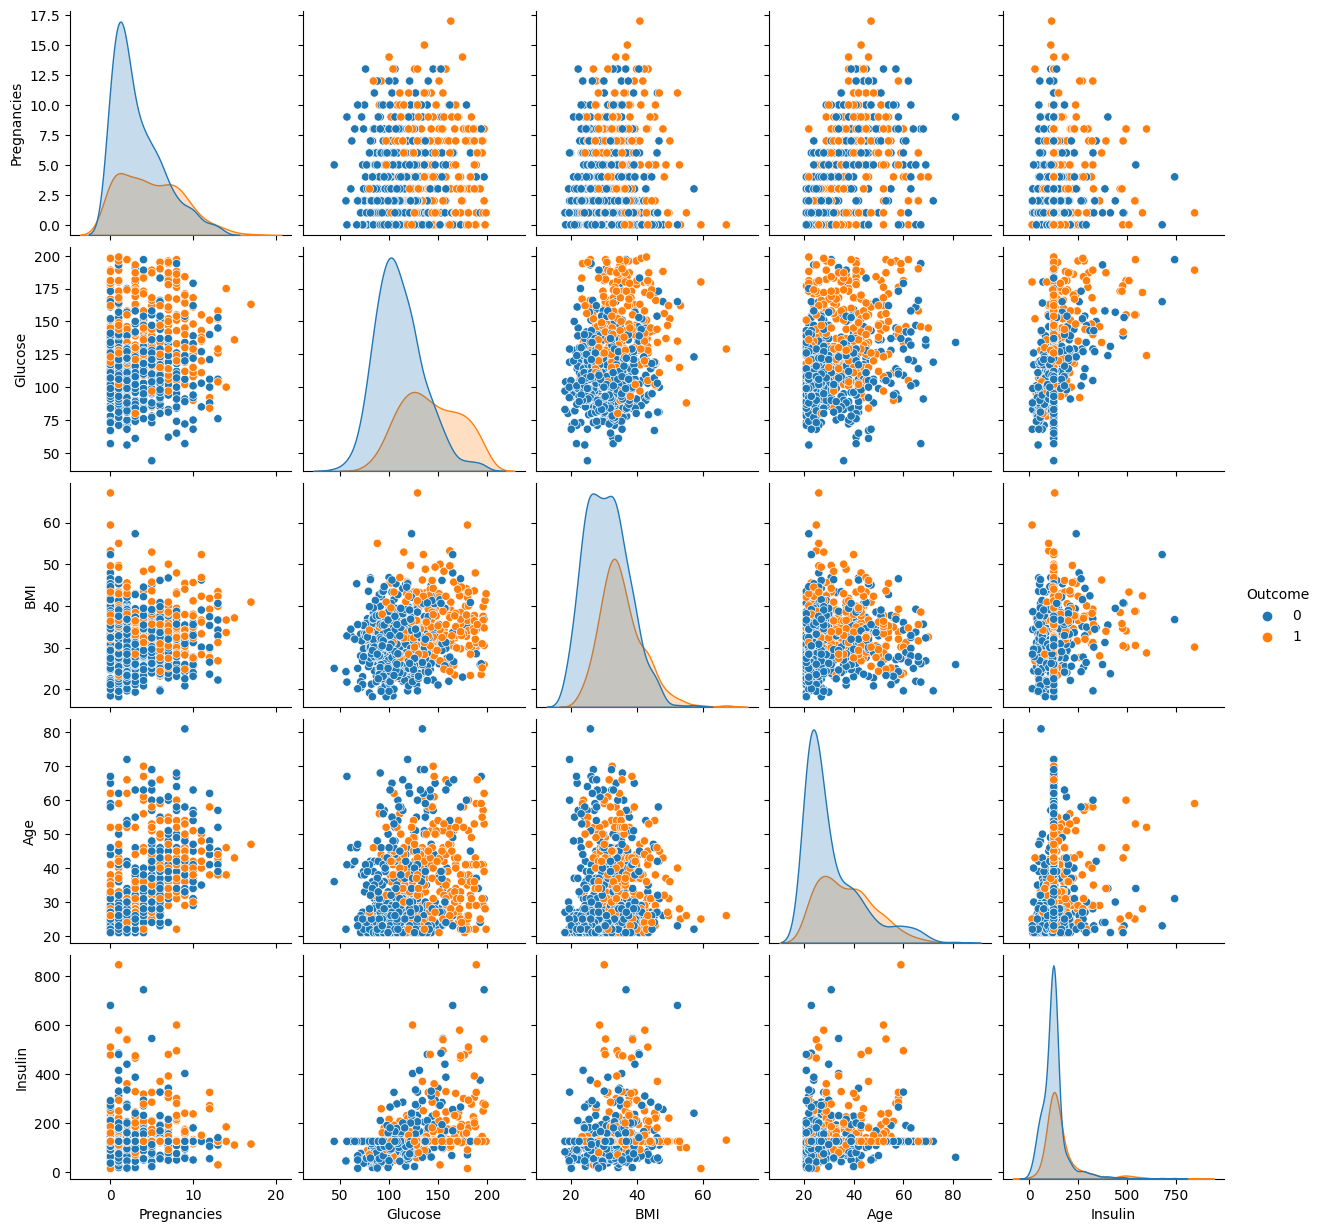

In [12]:
sns.pairplot(df, hue='Outcome', vars=['Pregnancies','Glucose','BMI','Age','Insulin'])
plt.show()


Helps visualize relationships between features for diabetic vs. non-diabetic patients.

Can spot patterns like higher glucose & BMI in diabetic patients.

## Boxplots for Outliers

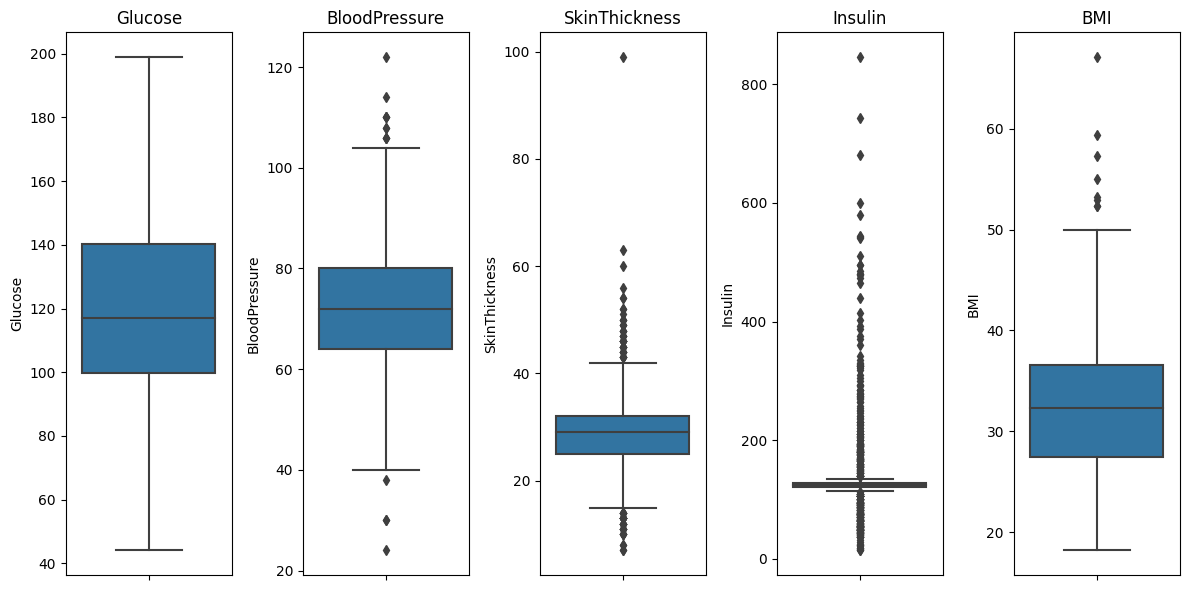

In [13]:
plt.figure(figsize=(12,6))
for i, col in enumerate(['Glucose','BloodPressure','SkinThickness','Insulin','BMI'], 1):
    plt.subplot(1,5,i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


## Split Features and Target

In [14]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


## Train-Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Store results
results = {}

# -----------------------------
# 1. Logistic Regression
# -----------------------------
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_pred)
}

# -----------------------------
# 2. Support Vector Machine
# -----------------------------
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

results['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_pred)
}

# -----------------------------
# 3. Random Forest
# -----------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_pred)
}

# -----------------------------
# 4. XGBoost
# -----------------------------
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

results['XGBoost'] = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_pred)
}

# -----------------------------
# 5. Display Comparison Table
# -----------------------------
results_df = pd.DataFrame(results).T
print(results_df)


                     Accuracy  Precision    Recall  F1-score   ROC-AUC
Logistic Regression  0.707792   0.600000  0.500000  0.545455  0.660000
SVM                  0.740260   0.652174  0.555556  0.600000  0.697778
Random Forest        0.740260   0.652174  0.555556  0.600000  0.697778
XGBoost              0.766234   0.680000  0.629630  0.653846  0.734815


# 1. Feature Importance (Random Forest / XGBoost)

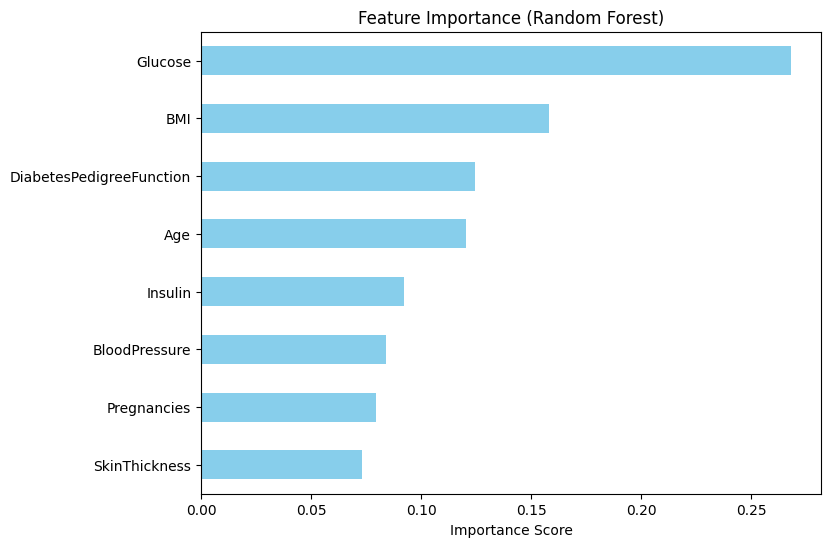

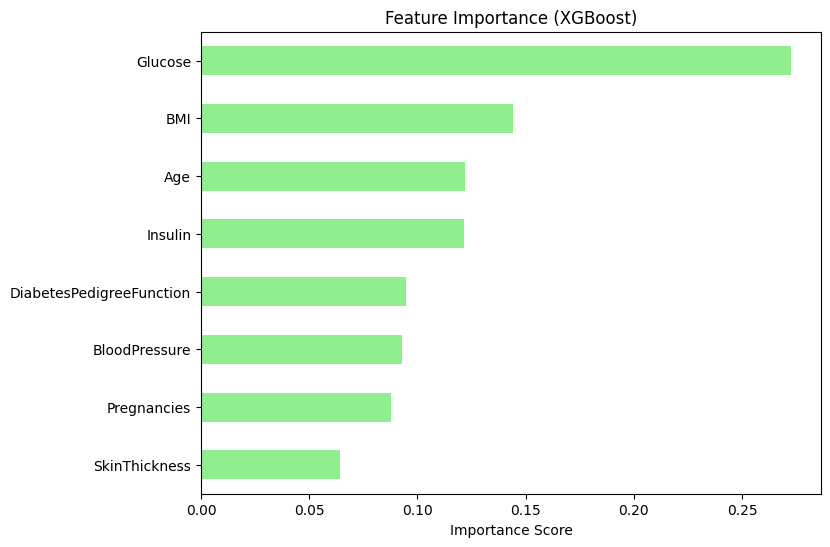

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance from Random Forest
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=True)

plt.figure(figsize=(8,6))
feat_importances.plot(kind='barh', color='skyblue')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

# Feature importance from XGBoost
xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8,6))
xgb_importances.plot(kind='barh', color='lightgreen')
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.show()


# 2. ROC Curve Visualization

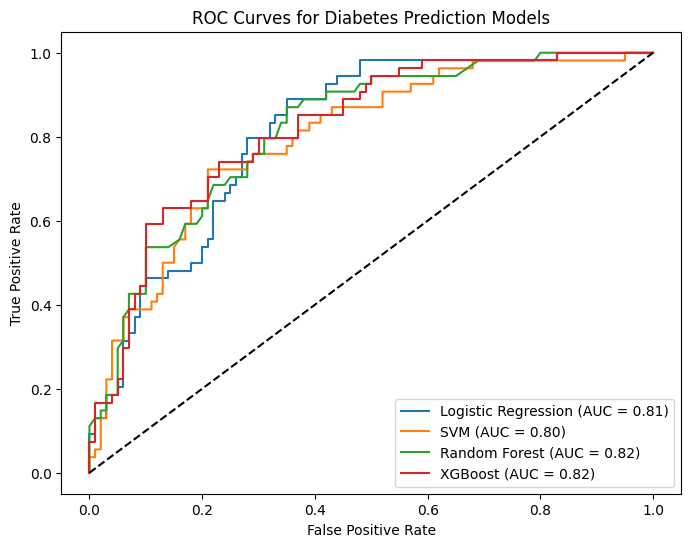

In [19]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

models = {'Logistic Regression': log_reg,
          'SVM': svm,
          'Random Forest': rf,
          'XGBoost': xgb}

for name, model in models.items():
    if name in ['Logistic Regression','SVM']:
        y_proba = model.predict_proba(X_test_scaled)[:,1]
    else:
        y_proba = model.predict_proba(X_test)[:,1]
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curves for Diabetes Prediction Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
